In [50]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 29 14:54:06 2019

@author: jon
"""
%matplotlib notebook

import pandas as pd
import geopandas as gp
from shapely.geometry import Polygon, Point
import os
import numpy as np
import pandas as  pd
import json
import math
from pandas.io.json import json_normalize

from datetime import datetime
from os import listdir
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

from MalardClient.MalardClient import MalardClient
from MalardClient.DataSet import DataSet
from MalardClient.BoundingBox import BoundingBox
from datetime import datetime

client = MalardClient()

def toGeoData(data):
    #data.drop(['geometry'], axis=1)
    geometry = []
    offset = 100000
    for idx, row in data.iterrows():
        geometry.append(Polygon([(row.x,row.y), (row.x,row.y+offset), (row.x+offset,row.y+offset), (row.x+offset,row.y), (row.x,row.y)]))
    
    gData = gp.GeoDataFrame(data, crs=crs, geometry=geometry)
    
    return gData

ds = DataSet('cryotempo', 'GRIS_BaselineC_Q2', 'greenland')
#ds = DataSet('cryotempo', 'AntarcticaV2b', 'antarctic')

client = MalardClient()
bbox = client.boundingBox( ds )
print(bbox)

countries = gp.read_file("/data/puma1/scratch/cryotempo/masks/icesheets.shp")

crs = client.getProjection(ds).proj4

minX=-700000, maxX=900000, minY=-3400000, maxY=-600000, minT=2011-02-01 05:16:06, maxT=2016-06-30 16:15:42 N=4986781805


<IPython.core.display.Javascript object>


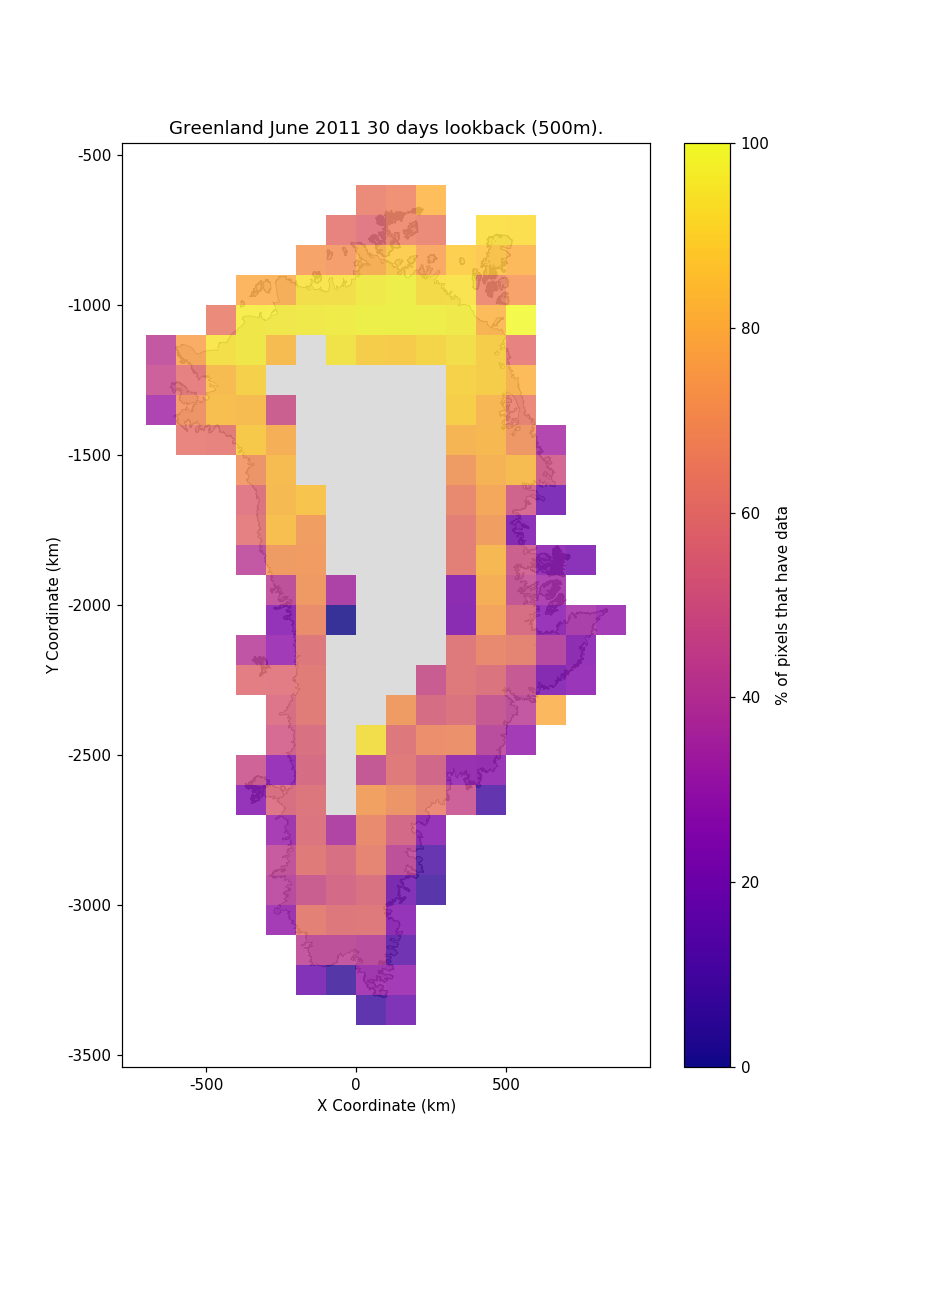

In [52]:

days = [30]
resolution = 500

for day in days :
    stats_dir = "/home/jon/data/stats/{}days/".format(day)

    stats = [ pd.read_csv("{}/{}".format(stats_dir,f)) for f in listdir(stats_dir) if f.endswith("{}m.csv".format(resolution)) ]

    stats_df = pd.concat(stats, ignore_index=True,sort=False)

    stats_df = stats_df[stats_df['inmask_count'] > 0]

    stats_df['coverage'] = 100*stats_df['gridded_count'] / stats_df['inmask_count']
    
    dfPolys = toGeoData(stats_df)
    #stats_df['coverage'].hist()
    #plt.suptitle("{}days".format(day))
    #plt.show()
    
    %matplotlib notebook

    # plot figure
    fig, ax = plt.subplots(figsize=(8,11))

    # plot background
    countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)

    # marker size
    markersize = 1 

    # min and max of colour scheme (change this!
    vmin= stats_df['coverage'].min()
    vmax= stats_df['coverage'].max()

    # color scheme
    cm = 'plasma'

    #plot data
    dfPolys.plot(ax=ax, column='coverage', vmin=0, vmax=vmax, cmap=cm, alpha=0.8)


    # add colorbar with label
    bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=vmax), cmap=cm))
    bar.set_label('% of pixels that have data')

    # add plot title
    plt.title("Greenland June 2011 {} days lookback ({}m).".format(day,resolution))
    ax.set_xlabel("X Coordinate (km)")
    
    ax.set_ylabel("Y Coordinate (km)")

    r = np.arange(-500000, bbox.maxX, 500000)
    ax.set_xticks(r)
    
    def format_func(value, tick_number):
        return "{}".format(int(value/1000))
    

    
        
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    
    fig.savefig("plots/greenland_{}days_{}m.png".format(day,resolution))
    